**<center> Joaquin Peñuela Parra, Cristian Fernando Rodriguez Cruz <center>**
**<center> University of Los Andes <center>**
**<center> High Energy Physics Group: Phenomenology of Particles <center>**

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

In [2]:
betards = ['wRHC', 'woRHC']
titulos_izquierda = {'Lq_Lq' : 'dLQ', 'tau_Lq' : 'sLQ', 'tau_tau' : 'non-res', 'Combined' : 'Combined'}
betard_title = {'wRHC': r'$, \mathbf{\beta_{R}}$ = -1', 'woRHC': r'$, \mathbf{\beta_{R}}$ = 0'}

def Calcular_g_U(c_U, M):
    v = 246
    return 2*np.sqrt(c_U)*M/v

In [3]:
format_figures = 'pdf'

In [4]:
N = 18

**Sigma Curves Summary 137 fb-1:** 

In [5]:
file = open("Significances/sigma_curves_137.pkl", 'rb')
sigma_curves_137 = pickle.load(file)
file.close()

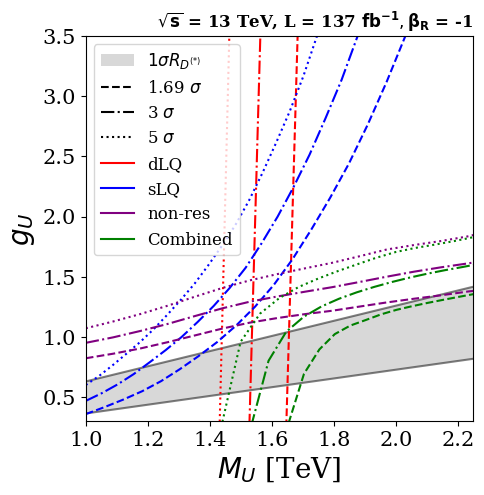

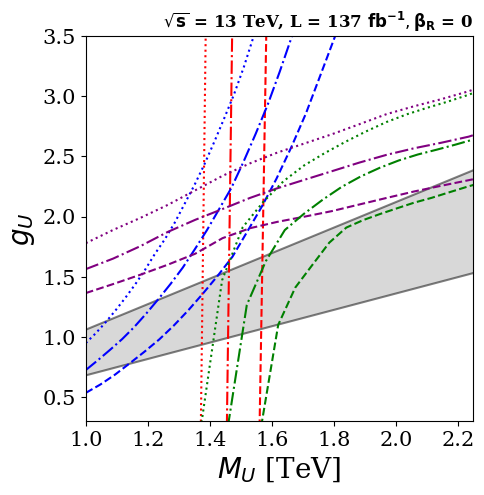

In [6]:
colors = {'Lq_Lq': 'red', 'tau_Lq': 'blue', 'tau_tau': 'purple', 'Combined': 'green'}

for betard in betards:    
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    if betard == 'wRHC': c_u1, c_u2 = 0.006, 0.002
    else:  c_u1, c_u2 = 0.017, 0.007

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(c_u1, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(c_u1, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(c_u2, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(c_u2, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3, label = r'$1 \sigma R_{D^{(*)}}$')  
    
    for n, key in enumerate(sigma_curves_137[betard]):
        
        curves = sigma_curves_137[betard][key]
        
        #Curva de 1.69 sigma
        x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
        y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
        data1 = pd.DataFrame(y1,x1)
        if key != 'Lq_Lq': 
            data1 = data1.sort_index(ascending = True)
            data1 = data1[~data1.index.duplicated(keep='first')]
            CS = CubicSpline(data1.index, data1.values)
            data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))
        else:
            data1 = pd.DataFrame([0.25,3.5],[min(data1.index), max(data1.index)])

        #Curva de 3 sigma
        x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
        y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
        data2 = pd.DataFrame(y2,x2)
        if key != 'Lq_Lq': 
            data2 = data2.sort_index(ascending = True)
            data2 = data2[~data2.index.duplicated(keep='first')]
            CS = CubicSpline(data2.index, data2.values)
            data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))
        else:
            data2 = pd.DataFrame([0.25,3.5],[min(data2.index), max(data2.index)])
            
        #Curva de 5 sigma
        x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
        y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
        data3 = pd.DataFrame(y3,x3)
        if key != 'Lq_Lq': 
            data3 = data3.sort_index(ascending = True)
            data3 = data3[~data3.index.duplicated(keep='first')]
            CS = CubicSpline(data3.index, data3.values)
            data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))
        else:
            data3 = pd.DataFrame([0.25,3.5],[min(data3.index), max(data3.index)])
            
        if n == 0:
            plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
            plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
            plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')
            
        plt.plot(0,0, color = colors[key], label = titulos_izquierda[key])
        plt.plot(data1, linestyle = 'dashed', color = colors[key])
        plt.plot(data2, linestyle = 'dashdot', color = colors[key])
        plt.plot(data3, linestyle = 'dotted', color = colors[key])   
        
    if betard == "wRHC": plt.legend(fontsize = 12)
    plt.xlim(1,2.25)
    plt.ylim(0.3,3.5)
    plt.title(r'$\mathbf{\sqrt{s}}$ = 13 TeV, L = 137 $\mathbf{fb^{-1}}$' + betard_title[betard], loc = 'right', fontsize = 12, fontweight="bold")
    plt.xlabel(r'$M_{U}$ [TeV]', fontsize = 20)
    plt.ylabel(r'$g_U$', fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.savefig(f'Significances/Significance_Curves_13TeV_L137_summary_all_sigmas_{betard}.{format_figures}', bbox_inches='tight')

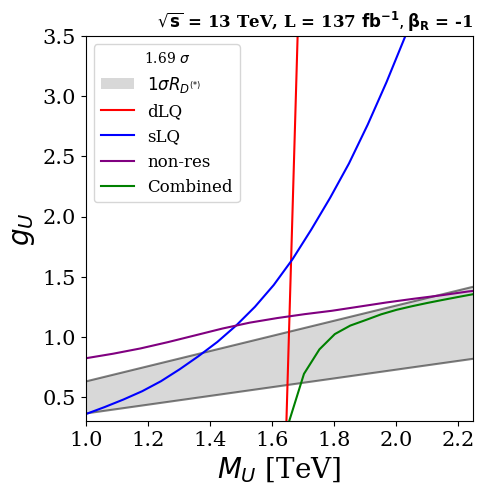

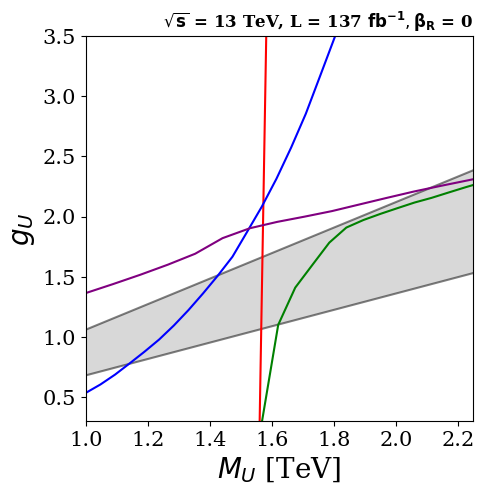

In [7]:
colors = {'Lq_Lq': 'red', 'tau_Lq': 'blue', 'tau_tau': 'purple', 'Combined': 'green'}

for betard in betards:    
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    if betard == 'wRHC': c_u1, c_u2 = 0.006, 0.002
    else:  c_u1, c_u2 = 0.017, 0.007

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(c_u1, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(c_u1, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(c_u2, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(c_u2, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3, label = r'$1 \sigma R_{D^{(*)}}$')  
    
    for n, key in enumerate(sigma_curves_137[betard]):
        
        curves = sigma_curves_137[betard][key]
        
        #Curva de 1.69 sigma
        x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
        y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
        data1 = pd.DataFrame(y1,x1)
        if key != 'Lq_Lq': 
            data1 = data1.sort_index(ascending = True)
            data1 = data1[~data1.index.duplicated(keep='first')]
            CS = CubicSpline(data1.index, data1.values)
            data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))
        else:
            data1 = pd.DataFrame([0.25,3.5],[min(data1.index), max(data1.index)])
            
        plt.plot(0,0, color = colors[key], label = titulos_izquierda[key])
        plt.plot(data1, linestyle = '-', color = colors[key])
    
        
    if betard == "wRHC": plt.legend(title = r'1.69 $\sigma$', fontsize = 12)
    plt.xlim(1,2.25)
    plt.ylim(0.3,3.5)
    plt.title(r'$\mathbf{\sqrt{s}}$ = 13 TeV, L = 137 $\mathbf{fb^{-1}}$' + betard_title[betard], loc = 'right', fontsize = 12, fontweight="bold")
    plt.xlabel(r'$M_{U}$ [TeV]', fontsize = 20)
    plt.ylabel(r'$g_U$', fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.savefig(f'Significances/Significance_Curves_13TeV_L137_summary_sigma_1_69_{betard}.{format_figures}', bbox_inches='tight')

**Comparison between doing as CMS and doing good:** 

In [8]:
file = open("Significances/sigma_curves_CMS_Comparison.pkl", 'rb')
sigma_curves_CMS = pickle.load(file)
file.close()

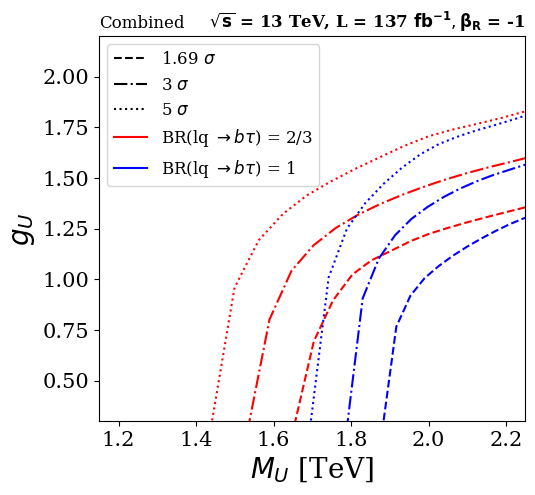

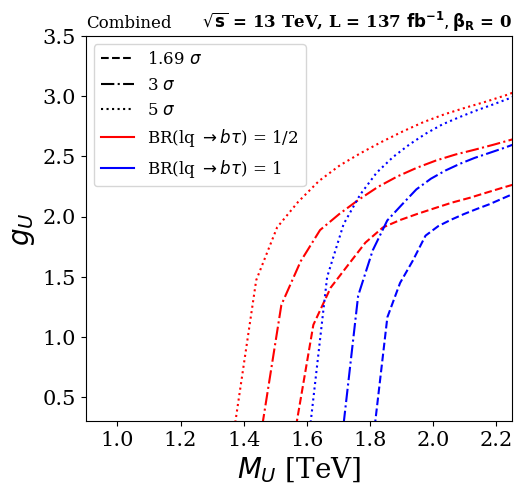

In [9]:
for betard in betards:    
    
    fig, ax = plt.subplots(figsize = (5.5,5))
    
    curves = sigma_curves_137[betard]['Combined']
    
    #Curva de 1.69 sigma
    x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
    y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
    data1 = pd.DataFrame(y1,x1)
    data1 = data1.sort_index(ascending = True)
    data1 = data1[~data1.index.duplicated(keep='first')]
    CS = CubicSpline(data1.index, data1.values)
    data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))
    
    #Curva de 3 sigma
    x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
    y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
    data2 = pd.DataFrame(y2,x2)
    data2 = data2.sort_index(ascending = True)
    data2 = data2[~data2.index.duplicated(keep='first')]
    CS = CubicSpline(data2.index, data2.values)
    data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))
    
    #Curva de 5 sigma
    x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
    y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
    data3 = pd.DataFrame(y3,x3)
    data3 = data3.sort_index(ascending = True)
    data3 = data3[~data3.index.duplicated(keep='first')]
    CS = CubicSpline(data3.index, data3.values)
    data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))
    
    plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
    plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
    plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')
    
    if betard == 'woRHC': BR_label = r'BR(lq $\rightarrow b \tau $) = 1/2'
    else: BR_label = r'BR(lq $\rightarrow b \tau $) = 2/3'

    plt.plot(0,0, color = 'red', label = BR_label)
    plt.plot(data1, linestyle = 'dashed', color = 'red')
    plt.plot(data2, linestyle = 'dashdot', color = 'red')
    plt.plot(data3, linestyle = 'dotted', color = 'red')     
    
    curves = sigma_curves_CMS[betard]['Combined']
    
    #Curva de 1.69 sigma
    x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
    y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
    data1 = pd.DataFrame(y1,x1)
    data1 = data1.sort_index(ascending = True)
    data1 = data1[~data1.index.duplicated(keep='first')]
    CS = CubicSpline(data1.index, data1.values)
    data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))
    
    #Curva de 3 sigma
    x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
    y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
    data2 = pd.DataFrame(y2,x2)
    data2 = data2.sort_index(ascending = True)
    data2 = data2[~data2.index.duplicated(keep='first')]
    CS = CubicSpline(data2.index, data2.values)
    data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))
    
    #Curva de 5 sigma
    x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
    y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
    data3 = pd.DataFrame(y3,x3)
    data3 = data3.sort_index(ascending = True)
    data3 = data3[~data3.index.duplicated(keep='first')]
    CS = CubicSpline(data3.index, data3.values)
    data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))

    plt.plot(0,0, color = 'blue', label = r'BR(lq $\rightarrow b \tau $) = 1')
    plt.plot(data1, linestyle = 'dashed', color = 'blue')
    plt.plot(data2, linestyle = 'dashdot', color = 'blue')
    plt.plot(data3, linestyle = 'dotted', color = 'blue')   
        
    plt.legend(loc = 'upper left', fontsize = 12)
    if betard == "wRHC":
        plt.xlim(1.15,2.25)
        plt.ylim(0.3,2.2)
    else:
        plt.xlim(0.9,2.25)
        plt.ylim(0.3,3.5)
        
    plt.title(r'$\mathbf{\sqrt{s}}$ = 13 TeV, L = 137 $\mathbf{fb^{-1}}$' + betard_title[betard], loc = 'right', fontsize = 12, fontweight="bold")
    plt.title('Combined', loc = 'left', fontsize = 12)
    plt.xlabel(r'$M_{U}$ [TeV]', fontsize = 20)
    plt.ylabel(r'$g_U$', fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.savefig(f'Significances/Significance_Curves_Comparision_by_BR_{betard}.{format_figures}', bbox_inches='tight')

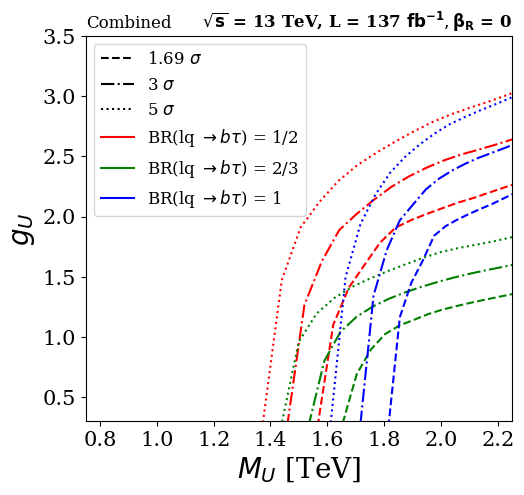

In [10]:
fig, ax = plt.subplots(figsize = (5.5,5))

plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')

curves = sigma_curves_137['woRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
data1 = pd.DataFrame(y1,x1)
data1 = data1.sort_index(ascending = True)
data1 = data1[~data1.index.duplicated(keep='first')]
CS = CubicSpline(data1.index, data1.values)
data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
data2 = pd.DataFrame(y2,x2)
data2 = data2.sort_index(ascending = True)
data2 = data2[~data2.index.duplicated(keep='first')]
CS = CubicSpline(data2.index, data2.values)
data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
data3 = pd.DataFrame(y3,x3)
data3 = data3.sort_index(ascending = True)
data3 = data3[~data3.index.duplicated(keep='first')]
CS = CubicSpline(data3.index, data3.values)
data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))

plt.plot(0,0, color = 'red', label = r'BR(lq $\rightarrow b \tau $) = 1/2')
plt.plot(data1, linestyle = 'dashed', color = 'red')
plt.plot(data2, linestyle = 'dashdot', color = 'red')
plt.plot(data3, linestyle = 'dotted', color = 'red')     


curves = sigma_curves_137['wRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
data1 = pd.DataFrame(y1,x1)
data1 = data1.sort_index(ascending = True)
data1 = data1[~data1.index.duplicated(keep='first')]
CS = CubicSpline(data1.index, data1.values)
data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
data2 = pd.DataFrame(y2,x2)
data2 = data2.sort_index(ascending = True)
data2 = data2[~data2.index.duplicated(keep='first')]
CS = CubicSpline(data2.index, data2.values)
data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
data3 = pd.DataFrame(y3,x3)
data3 = data3.sort_index(ascending = True)
data3 = data3[~data3.index.duplicated(keep='first')]
CS = CubicSpline(data3.index, data3.values)
data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))

plt.plot(0,0, color = 'green', label = r'BR(lq $\rightarrow b \tau $) = 2/3')
plt.plot(data1, linestyle = 'dashed', color = 'green')
plt.plot(data2, linestyle = 'dashdot', color = 'green')
plt.plot(data3, linestyle = 'dotted', color = 'green')    

curves = sigma_curves_CMS['woRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
data1 = pd.DataFrame(y1,x1)
data1 = data1.sort_index(ascending = True)
data1 = data1[~data1.index.duplicated(keep='first')]
CS = CubicSpline(data1.index, data1.values)
data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
data2 = pd.DataFrame(y2,x2)
data2 = data2.sort_index(ascending = True)
data2 = data2[~data2.index.duplicated(keep='first')]
CS = CubicSpline(data2.index, data2.values)
data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
data3 = pd.DataFrame(y3,x3)
data3 = data3.sort_index(ascending = True)
data3 = data3[~data3.index.duplicated(keep='first')]
CS = CubicSpline(data3.index, data3.values)
data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))

plt.plot(0,0, color = 'blue', label = r'BR(lq $\rightarrow b \tau $) = 1')
plt.plot(data1, linestyle = 'dashed', color = 'blue')
plt.plot(data2, linestyle = 'dashdot', color = 'blue')
plt.plot(data3, linestyle = 'dotted', color = 'blue')   

plt.legend(loc = 'upper left', fontsize = 12)
plt.xlim(0.75,2.25)
plt.ylim(0.3,3.5)
        
plt.title(r'$\mathbf{\sqrt{s}}$ = 13 TeV, L = 137 $\mathbf{fb^{-1}}$' + betard_title[betard], loc = 'right', fontsize = 12, fontweight="bold")
plt.title('Combined', loc = 'left', fontsize = 12)
plt.xlabel(r'$M_{U}$ [TeV]', fontsize = 20)
plt.ylabel(r'$g_U$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig(f'Significances/Significance_Curves_Summary_by_BR.{format_figures}', bbox_inches='tight')

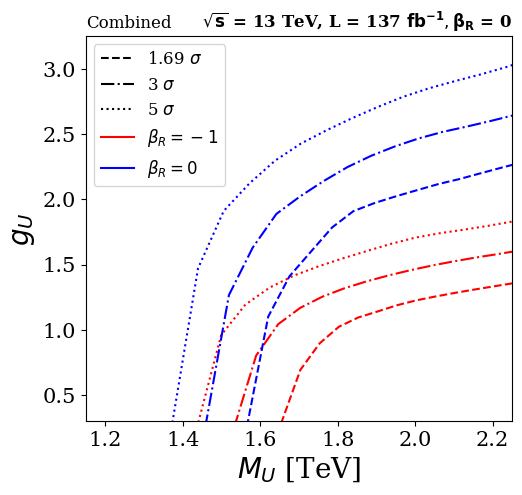

In [11]:
fig, ax = plt.subplots(figsize = (5.5,5))

curves = sigma_curves_137['wRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
data1 = pd.DataFrame(y1,x1)
data1 = data1.sort_index(ascending = True)
data1 = data1[~data1.index.duplicated(keep='first')]
CS = CubicSpline(data1.index, data1.values)
data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
data2 = pd.DataFrame(y2,x2)
data2 = data2.sort_index(ascending = True)
data2 = data2[~data2.index.duplicated(keep='first')]
CS = CubicSpline(data2.index, data2.values)
data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
data3 = pd.DataFrame(y3,x3)
data3 = data3.sort_index(ascending = True)
data3 = data3[~data3.index.duplicated(keep='first')]
CS = CubicSpline(data3.index, data3.values)
data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))

plt.plot(0,0, label = r'1.69 $\sigma$', linestyle = 'dashed', c = 'black')
plt.plot(0,0, label = r'3 $\sigma$', linestyle = 'dashdot', c = 'black')
plt.plot(0,0, label = r'5 $\sigma$', linestyle = 'dotted', c = 'black')

plt.plot(0,0, color = 'red', label = r'$\beta_{R} = -1$')
plt.plot(data1, linestyle = 'dashed', color = 'red')
plt.plot(data2, linestyle = 'dashdot', color = 'red')
plt.plot(data3, linestyle = 'dotted', color = 'red')     

curves = sigma_curves_137['woRHC']['Combined']

#Curva de 1.69 sigma
x1 = np.concatenate([points.vertices[:,0] for points in curves.collections[0].get_paths()])
y1 = np.concatenate([points.vertices[:,1] for points in curves.collections[0].get_paths()])
data1 = pd.DataFrame(y1,x1)
data1 = data1.sort_index(ascending = True)
data1 = data1[~data1.index.duplicated(keep='first')]
CS = CubicSpline(data1.index, data1.values)
data1 = pd.DataFrame(CS(np.linspace(min(data1.index), max(data1.index), N)),np.linspace(min(data1.index), max(data1.index), N))

#Curva de 3 sigma
x2 = np.concatenate([points.vertices[:,0] for points in curves.collections[1].get_paths()])
y2 = np.concatenate([points.vertices[:,1] for points in curves.collections[1].get_paths()])
data2 = pd.DataFrame(y2,x2)
data2 = data2.sort_index(ascending = True)
data2 = data2[~data2.index.duplicated(keep='first')]
CS = CubicSpline(data2.index, data2.values)
data2 = pd.DataFrame(CS(np.linspace(min(data2.index), max(data2.index), N)),np.linspace(min(data2.index), max(data2.index), N))

#Curva de 5 sigma
x3 = np.concatenate([points.vertices[:,0] for points in curves.collections[2].get_paths()])
y3 = np.concatenate([points.vertices[:,1] for points in curves.collections[2].get_paths()])
data3 = pd.DataFrame(y3,x3)
data3 = data3.sort_index(ascending = True)
data3 = data3[~data3.index.duplicated(keep='first')]
CS = CubicSpline(data3.index, data3.values)
data3 = pd.DataFrame(CS(np.linspace(min(data3.index), max(data3.index), N)),np.linspace(min(data3.index), max(data3.index), N))

plt.plot(0,0, color = 'blue', label = r'$\beta_{R} = 0$')
plt.plot(data1, linestyle = 'dashed', color = 'blue')
plt.plot(data2, linestyle = 'dashdot', color = 'blue')
plt.plot(data3, linestyle = 'dotted', color = 'blue')   

plt.legend(loc = 'upper left', fontsize = 12)
plt.xlim(1.15,2.25)
plt.ylim(0.3,3.25)

plt.title(r'$\mathbf{\sqrt{s}}$ = 13 TeV, L = 137 $\mathbf{fb^{-1}}$' + betard_title[betard], loc = 'right', fontsize = 12, fontweight="bold")
plt.title('Combined', loc = 'left', fontsize = 12)
plt.xlabel(r'$M_{U}$ [TeV]', fontsize = 20)
plt.ylabel(r'$g_U$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig(f'Significances/Significance_Curves_Comparing_wRHC_and_woRHC.{format_figures}', bbox_inches='tight')

In [12]:
# !rm */*.pkl